In [1]:
import numpy as np
import pandas as pd
from tools.get_data.get_data_h5 import *
from pandasgui import show
import talib as ta
import datetime
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import roll_time_series
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 1000)


### 1. 获取factor数据

In [2]:
from importlib import reload
import factors as dl
reload(dl)
run = 0
if run == 1:
    data = get_data(symbol="rb99", freq="minbar", type="future",
                    source_dir="Y:/DataBase_RQ_files/")
    data["sma_diff_5"] = dl.sma_diff(data, 5)
    data["sma_diff_60"] = dl.sma_diff(data, 60)
    data["ema_diff_10"] = dl.ema_diff(data, 10)
    data["ema_diff_60"] = dl.ema_diff(data, 60)
    data["sma_of_sma_5_5"] = dl.sma_of_sma(data, 5, 5)
    data["ema_of_ema_5_5"] = dl.ema_of_ema(data, 5, 5)
    data["high_30"] = dl.high(data, 30)
    data["low_30"] = dl.low(data, 30)
    data["high_60"] = dl.high(data, 60)
    data["low_60"] = dl.low(data, 60)
    data["wl_30"] = dl.wl(data, 30)
    data["wl_60"] = dl.wl(data, 60)
    data["macd_dif"], data["macd_dea"], data["macd_hist"], data["macd_signal"] = dl.MACD(
        data, fast=10, slow=60, mid=15)
    data["slope"] = dl.slope(data, 60)
    data["rsi"] = dl.rsi(data, 60)
    data["sar"] = dl.sar(data)
    data["rwr"] = dl.rwr(data, 60)
    data["aroon_up"], data["aroon_down"], data["aroon"] = dl.aroon(data, 60)
    data["tendstrength"] = dl.tendstrength(data, 60)
    data["boll"] = dl.boll(data, 60)
    data["don"] = dl.don(data, 60)
    data["sf01"] = dl.sf01(data, 60)
    data["cor_vol"] = dl.cor_vol(data, 60)
    data["cor_oi"] = dl.cor_oi(data, 60)

    l = [1, 3, 5] + (list(range(10, 201, 5)))
    for i in l:
        data["shift_{}_rtn".format(i)] = dl.rtn_shift(data.close, i)
    print("liqka前工作完成", len(data))

    data["long_liqka"] = dl.long_liqka(data)
    data["short_liqka"] = dl.short_liqka(data)

    data.to_feather("factor.feather")
    data = pd.read_feather("factor.feather")
    data.dropna(inplace=True)

### 2. 因子分析

In [3]:
from importlib import reload    
import factor_analysis as fa
reload(fa)
# data =data.head(42000)

# print("factos_cols", factors_cols,"\nrtn_cols",rtn_cols)
run = 0
if run == 1:
    data.set_index("datetime", inplace=True, drop=True)
    factors_cols = []
    rtn_cols = []
    for col in data.columns:
        if col not in ['datetime', 'trading_date', "symbol"]:
            if "rtn" not in col and "liqka" not in col:
                factors_cols.append(col)
            else:
                rtn_cols.append(col)
    factors = data[factors_cols]
    rtn = data[rtn_cols]
    fal = fa.FactorAnalysis_ori()
    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=20000)

In [4]:
rank_df =pd.read_parquet("symbol_5000_10_rank_df.parquet")
#results_df =pd.read_parquet("symbol_10_results_df.parquet")
# show(rank_df.head(500))


In [5]:
a = rank_df.copy()
a.head(5)

,open,high,low,close,volume,total_turnover,open_interest,sma_diff_5,sma_diff_20000,ema_diff_300,...,rwr_100_rank,aroon_up_rank,aroon_rank,aroon_down_rank,tendstrength_rank,boll_rank,cor_vol_rank,cor_oi_rank,don_rank,sf01_rank
datetime,,,,,,,,,,,,,,,,,,,,,
2010-06-22 09:25:00,4151.0585,4151.9785,4148.3862,4149.1974,16688.0,691290040.0,1355660,0.054326,7.490240,-0.199012,...,8.0,6.0,5.0,4.0,7.0,5.0,9.0,8.0,1.0,2.0
2010-06-22 09:26:00,4150.1120,4150.2207,4148.4892,4150.1120,8016.0,331918640.0,1356470,0.018903,7.466499,-0.219538,...,7.0,5.0,5.0,3.0,7.0,5.0,9.0,8.0,2.0,3.0
2010-06-22 09:27:00,4148.4815,4151.0342,4148.4702,4150.9142,2552.0,105871720.0,1355896,-0.005473,7.445680,-0.237235,...,8.0,5.0,5.0,3.0,7.0,5.0,9.0,8.0,2.0,3.0
2010-06-22 09:28:00,4150.1288,4150.9400,4149.2088,4150.1288,4206.0,174236540.0,1355706,0.004063,7.465963,-0.216904,...,9.0,5.0,5.0,3.0,7.0,5.0,9.0,8.0,2.0,3.0
2010-06-22 09:29:00,4149.9498,4153.5219,4149.9498,4152.7111,8628.0,357622500.0,1352088,-0.050531,7.399092,-0.277099,...,9.0,5.0,5.0,3.0,7.0,5.0,9.0,8.0,2.0,3.0


In [ ]:
def rtn_shift(data: pd.Series, n):
    """
    计算n期的对数收益率
    """
    return (data.shift(-n) - data)/ data * 100
#  -0.020000

    # return (np.log(data / data.shift(n))-1/10000) * 100

a1 = a[['close','rsi_60','shift_1_rtn', 'shift_3_rtn', 'shift_5_rtn',  'shift_10_rtn']]
a1['test1'] = rtn_shift(a1['close'], 1)
a1['test3'] = rtn_shift(a1['close'], 3)
a1['test5'] = rtn_shift(a1['close'], 5)
a1['test10'] = rtn_shift(a1['close'], 10)
a1.head(20)

In [ ]:
a1['']

In [ ]:
4257.9828 - 4257.9830

# MOD@1 查看因子rank的分组频数

In [6]:
# MOD1 查看因子rank的分组频数
a = rank_df.copy()
x = []
y = []
for i in a.columns:
    if "rank" in i:
        x.append(i)
    elif 'shift_' in i:
        y.append(i)

rtn_col = y
factors_col = x
        
counts = {}
for i in factors_col:
    # print(i)
    data = {}
    for ii , d in a.groupby(i):
        #print(i, ii, len(d))
        
        data[ii] = len(d)
    counts[i] = data
countdf = pd.DataFrame(counts)#.transpose()
countdf

,open_interest_rank,low_rank,open_rank,high_60_rank,high_rank,sma_diff_sma_5_100_rank,low_60_rank,sma_diff_20000_rank,close_rank,ema_diff_1000_rank,...,rwr_100_rank,aroon_up_rank,aroon_rank,aroon_down_rank,tendstrength_rank,boll_rank,cor_vol_rank,cor_oi_rank,don_rank,sf01_rank
0.0,209299,193981,194552,108730,195273,97703,108031,219294,194570,114245,...,100649,135008,102254,131085,100599,98324,99889,122727,98945,98194
1.0,83646,85537,85303,92634,85051,95728,92952,87373,85310,94947,...,94872,88350,95607,89450,96092,97755,95769,92376,96909,96502
2.0,63004,67874,67986,94671,68092,95549,94834,71922,67979,91146,...,96154,95063,96426,95353,95860,97131,96892,87318,96090,96736
3.0,64179,59013,58976,95336,58866,95983,95324,63370,58982,89105,...,96335,95723,96718,95976,95935,95678,96025,84969,96467,95934
4.0,58159,57456,57435,95973,57393,97088,96386,61509,57432,90976,...,95434,95957,94339,96369,95446,95322,95722,87767,95518,96247
5.0,60447,58965,59126,96958,59114,96738,97009,62504,59102,90060,...,95760,96783,97111,96622,95582,95604,95549,88805,95374,96027
6.0,61418,62782,62839,98058,63086,97739,98180,64529,62874,90007,...,95907,96907,97752,96928,95816,95637,95269,92787,96276,96505
7.0,71452,76085,76208,100346,76176,97026,100483,68619,76155,88592,...,95053,98283,94732,98276,95201,95544,95520,93812,95822,96281
8.0,90572,98117,98239,107129,98442,95282,106576,83911,98171,97470,...,96128,99232,97078,99499,96426,98037,96398,95855,97119,96887
9.0,205179,207545,206691,77520,205862,98519,77580,184324,206780,120807,...,101063,66049,95338,67797,100398,98323,100322,120939,98835,98042


<AxesSubplot:>

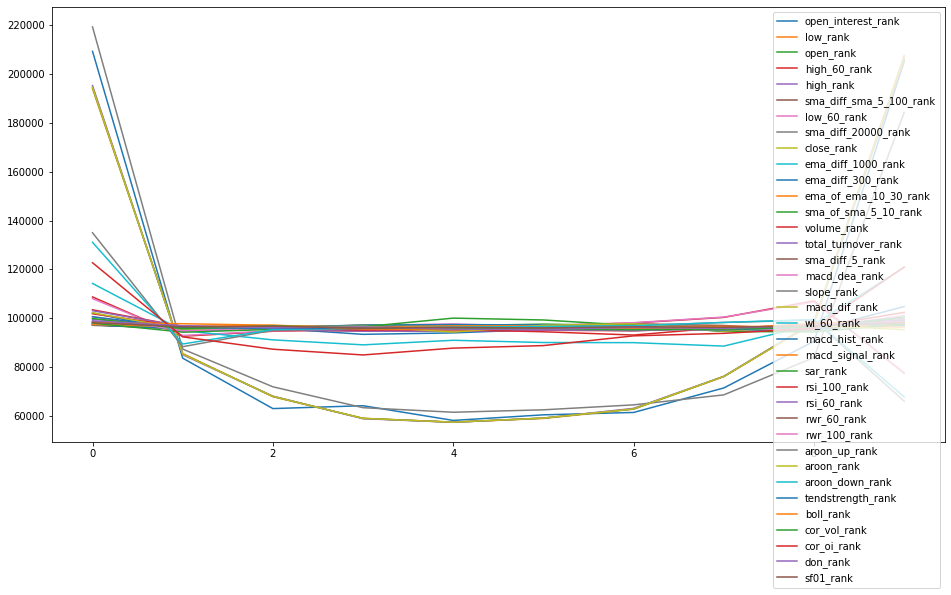

In [7]:
countdf.plot(figsize=(16,8))

In [8]:
countdfv = countdf.transpose()
countdfv

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
open_interest_rank,209299,83646,63004,64179,58159,60447,61418,71452,90572,205179
low_rank,193981,85537,67874,59013,57456,58965,62782,76085,98117,207545
open_rank,194552,85303,67986,58976,57435,59126,62839,76208,98239,206691
high_60_rank,108730,92634,94671,95336,95973,96958,98058,100346,107129,77520
high_rank,195273,85051,68092,58866,57393,59114,63086,76176,98442,205862
sma_diff_sma_5_100_rank,97703,95728,95549,95983,97088,96738,97739,97026,95282,98519
low_60_rank,108031,92952,94834,95324,96386,97009,98180,100483,106576,77580
sma_diff_20000_rank,219294,87373,71922,63370,61509,62504,64529,68619,83911,184324
close_rank,194570,85310,67979,58982,57432,59102,62874,76155,98171,206780
ema_diff_1000_rank,114245,94947,91146,89105,90976,90060,90007,88592,97470,120807


# MOD@2  补全y：n分钟后的收益率

In [9]:
# 先删除
for i in a.columns:
    if '_rtn' in i:
        del a[i]

# 后补全
l = [1, 3, 5] + (list(range(10, 201, 5)))
for i in l:
    name = f'shift_{i}_rtn'
    a[name] = (a['close'].shift(-i) - a["close"])  /a["close"]
a.head(5)

c:\vnstudio\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


,open,high,low,close,volume,total_turnover,open_interest,sma_diff_5,sma_diff_20000,ema_diff_300,...,shift_155_rtn,shift_160_rtn,shift_165_rtn,shift_170_rtn,shift_175_rtn,shift_180_rtn,shift_185_rtn,shift_190_rtn,shift_195_rtn,shift_200_rtn
datetime,,,,,,,,,,,,,,,,,,,,,
2010-06-22 09:25:00,4151.0585,4151.9785,4148.3862,4149.1974,16688.0,691290040.0,1355660,0.054326,7.490240,-0.199012,...,0.001822,0.001822,0.001583,0.000958,0.001600,0.002060,0.000994,0.000799,-0.000061,0.000089
2010-06-22 09:26:00,4150.1120,4150.2207,4148.4892,4150.1120,8016.0,331918640.0,1356470,0.018903,7.466499,-0.219538,...,0.001601,0.001588,0.001352,0.000994,0.001571,0.001841,0.000787,0.000357,-0.000294,-0.013523
2010-06-22 09:27:00,4148.4815,4151.0342,4148.4702,4150.9142,2552.0,105871720.0,1355896,-0.005473,7.445680,-0.237235,...,0.001408,0.001464,0.000976,0.001188,0.001624,0.001229,0.000813,-0.000049,-0.000260,-0.016013
2010-06-22 09:28:00,4150.1288,4150.9400,4149.2088,4150.1288,4206.0,174236540.0,1355706,0.004063,7.465963,-0.216904,...,0.001597,0.001398,0.001582,0.001403,0.001857,0.001161,0.000966,-0.000065,-0.000121,-0.017500
2010-06-22 09:29:00,4149.9498,4153.5219,4149.9498,4152.7111,8628.0,357622500.0,1352088,-0.050531,7.399092,-0.277099,...,0.000974,0.000996,-0.000110,0.000780,0.001186,-0.000272,0.000375,-0.000689,-0.001161,-0.016791


# MOD@3 查看前n名的胜率

In [10]:
def _win_rate(series):
    return (series > 0).mean()*100

results = pd.DataFrame()

for i in factors_col:
    mean_rtn = a.groupby(i)[
        [rtn for rtn in rtn_col]].mean()
    win_rate = a.groupby(i)[
        [rtn for rtn in rtn_col]].apply(_win_rate)
    
    result = pd.merge(
        mean_rtn, win_rate, on=i, how="outer", suffixes=("_mean", "_win_rate"))
    # result.index.name = "rank"
    result.index = pd.MultiIndex.from_product([[i.replace("_rank", '')], result.index])
    results = pd.concat([results, result], axis=0)
    results.index.names = ["factor", "rank"]    

In [11]:
def returns_select(results, top=30):
    """
    返回一个dict, key为因子名, values为一个dataframe, 包含前top名的mean_rtn, win_rate
    results: factor_ranked的返回值

    """
    top10_rtn = {}
    for i in results.columns:
        if "mean" in i:
            j = i.replace("mean", "win_rate")
        if "win_rate" in i:
            j = i.replace("win_rate", "mean")
        _top10 = results.sort_values(
            i, ascending=False).head(top)[[i, j]]
        # print(_top10,type(_top10))

        top10_rtn[i] = _top10
    return top10_rtn

r1 = returns_select(results, 2)
r1

{'shift_1_rtn_mean':                  shift_1_rtn_mean  shift_1_rtn_win_rate
 factor     rank                                        
 sma_diff_5 9.0           0.000067             57.987278
            8.0           0.000043             55.844765,
 'shift_3_rtn_mean':                  shift_3_rtn_mean  shift_3_rtn_win_rate
 factor     rank                                        
 sma_diff_5 8.0           0.000051             54.599091
            7.0           0.000036             53.428654,
 'shift_5_rtn_mean':                  shift_5_rtn_mean  shift_5_rtn_win_rate
 factor     rank                                        
 sma_diff_5 8.0           0.000062             54.608473
 aroon_down 7.0           0.000056             51.434735,
 'shift_10_rtn_mean':              shift_10_rtn_mean  shift_10_rtn_win_rate
 factor rank                                          
 don    8.0            0.000122              49.755455
 wl_60  8.0            0.000116              48.951721,
 'shift_15_